In [1]:
# import the used packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pvlib

# set the font as times new roman
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
# read the data
# 0-1439 represent the number of minute in the indexed date
# clear day: 1 means the day is a clear day

# the data is available at https://drive.google.com/file/d/131K5yiZxd3rKBQKbbA0crp3JItPrREGd/view?usp=sharing

df = pd.read_csv('2009_20_solar_ghi_dra_daily.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df['date'])
df = df.drop(columns=['date','clear day'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,70.1,67.6,65.2,62.8,60.3,57.6,55.2,52.8,50.4,48.0,...,99.5,97.7,96.3,92.8,88.6,84.9,81.9,79.1,76.5,73.6
2009-01-03,71.3,68.7,66.2,64.4,63.4,60.9,58.3,55.4,49.7,38.0,...,108.3,105.4,102.5,99.3,96.2,93.4,90.7,87.8,84.9,82.0
2009-01-04,79.0,76.4,73.7,70.9,68.1,65.5,62.8,60.2,57.5,55.1,...,111.7,108.9,105.8,102.9,100.0,96.9,94.1,91.1,88.3,85.5
2009-01-05,82.7,79.8,77.0,74.3,71.5,68.6,65.8,63.3,60.7,57.6,...,16.4,18.7,20.5,20.8,20.3,20.0,20.3,19.7,17.2,14.0
2009-01-06,11.2,8.6,6.7,5.8,5.0,4.3,3.4,2.6,2.4,2.6,...,105.3,102.8,99.9,97.3,94.5,90.2,85.4,82.9,81.5,79.4


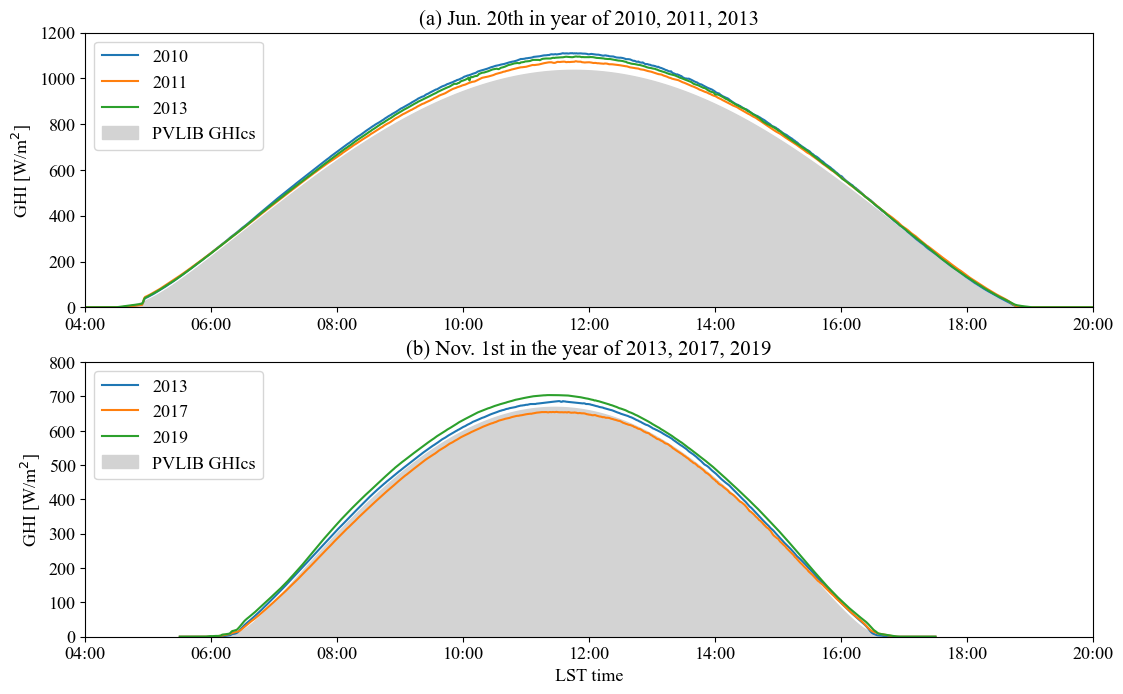

In [3]:
plt.figure(figsize=(13,8),dpi=100)

plt.subplot(211)
times = pd.date_range(start='2010-06-20 12:00:00',end='2010-06-21 04:00:00',freq='1min')
latitude, longitude, name, altitude = 36.624, -116.019 ,'DRA', 1007 

solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude) # get solar position
dni_extra = pvlib.irradiance.get_extra_radiation(times) # direct normal irradiance at top of atmosphere
airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith']) # get the airmass
pressure = pvlib.atmosphere.alt2pres(altitude) # pressure changes with altitude
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) # absolute airmass
tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude) # get linke turbidity
cs = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl,
                                    dni_extra=dni_extra, altitude=altitude) # ineichen clear sky model
df1 = df.copy()
df1[df1 < 0] = 0 # set the negative values as 0

dates = ['2010-06-20','2010-06-21','2011-06-20','2011-06-21','2013-06-20','2013-06-21']
dates = pd.to_datetime(dates)

times1 = pd.date_range(start='2010-06-20 12:00:00',end='2010-06-21 04:00:00',freq='1min') # set the time series for x-aixs

# select and plot the data in the daytime
plt.plot(times1,list(df1.loc[dates[0]].values)[720:]+list(df1.loc[dates[1]].values)[:241],label='2010')
plt.plot(times1,list(df1.loc[dates[2]].values)[720:]+list(df1.loc[dates[3]].values)[:241],label='2011')
plt.plot(times1,list(df1.loc[dates[4]].values)[720:]+list(df1.loc[dates[5]].values)[:241],label='2013')

plt.fill(times1,cs['ghi'],color='lightgray',label='PVLIB GHIcs')
plt.legend(loc=2, fontsize = 13)
plt.title('(a) Jun. 20th in year of 2010, 2011, 2013',fontsize = 15)

plt.ylim(0,1200)

x_index = pd.date_range(start='2010-06-20 12:00:00',end='2010-06-21 04:00:00',freq='2h')
plt.xlim(x_index[0],x_index[-1])

plt.ylabel('GHI [W/m$^2$]', fontsize = 13)

# set the labels for the x-axis
plt.xticks(pd.date_range(start='2010-06-20 12:00:00',end='2010-06-21 04:00:00',freq='2h'),
          ['04:00','06:00','08:00','10:00','12:00','14:00','16:00','18:00','20:00'], fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(212)
times = pd.date_range(start='2013-11-1 13:30:00',end='2013-11-2 01:30:00',freq='1min')
latitude, longitude, name, altitude = 36.624, -116.019 ,'DRA', 1007 

solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
dni_extra = pvlib.irradiance.get_extra_radiation(times) 
airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith']) 
pressure = pvlib.atmosphere.alt2pres(altitude) 
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude) 
cs = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl,
                                    dni_extra=dni_extra, altitude=altitude)
df1 = df.copy()
df1[df1 < 0] = 0

dates = ['2013-11-1','2013-11-2','2017-11-1','2017-11-2','2019-11-1','2019-11-2']
dates = pd.to_datetime(dates)

times1 = pd.date_range(start='2013-11-1 13:30:00',end='2013-11-2 01:30:00',freq='1min')

plt.plot(times1,list(df1.loc[dates[0]].values)[810:]+list(df1.loc[dates[1]].values)[:91],label='2013')
plt.plot(times1,list(df1.loc[dates[2]].values)[810:]+list(df1.loc[dates[3]].values)[:91],label='2017')
plt.plot(times1,list(df1.loc[dates[4]].values)[810:]+list(df1.loc[dates[5]].values)[:91],label='2019')

plt.fill(times1,cs['ghi'],color='lightgray',label='PVLIB GHIcs')
plt.legend(loc = 2, fontsize = 13)
plt.title('(b) Nov. 1st in the year of 2013, 2017, 2019',fontsize = 15)
plt.xlabel('LST time', fontsize = 13)

plt.ylim(0,800)
x_index = pd.date_range(start='2013-11-01 12:00:00',end='2013-11-02 04:00:00',freq='2h')

plt.xlim(x_index[0],x_index[-1])
plt.ylabel('GHI [W/m$^2$]', fontsize = 13)

plt.xticks(pd.date_range(start='2013-11-1 12:00:00',end='2013-11-2 04:00:00',freq='2h'),
           ['04:00','06:00','08:00','10:00','12:00','14:00','16:00','18:00','20:00'], fontsize = 13)
plt.yticks(fontsize = 13)
#plt.savefig('fig1.pdf',bbox_inches='tight')
plt.show()